In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_csv('/kaggle/input/protein-data-set/pdb_data_seq.csv')

print(data.head())


  structureId chainId                                           sequence  \
0        100D       A                                         CCGGCGCCGG   
1        100D       B                                         CCGGCGCCGG   
2        101D       A                                       CGCGAATTCGCG   
3        101D       B                                       CGCGAATTCGCG   
4        101M       A  MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...   

   residueCount macromoleculeType  
0            20    DNA/RNA Hybrid  
1            20    DNA/RNA Hybrid  
2            24               DNA  
3            24               DNA  
4           154           Protein  


# EDA
    

Shape of the dataset:  (467304, 5)
Data types of the columns:  structureId          object
chainId              object
sequence             object
residueCount          int64
macromoleculeType    object
dtype: object
Missing values in each column:  structureId              0
chainId                 10
sequence                28
residueCount             0
macromoleculeType    34817
dtype: int64
Distribution of the target variable:  Protein                       345175
Protein#RNA                    56219
Protein#DNA                    21303
DNA                             3784
Protein#DNA#RNA                 2712
RNA                             2389
Protein#RNA#DNA/RNA Hybrid       303
Protein#DNA#DNA/RNA Hybrid       159
DNA/RNA Hybrid                   141
DNA#RNA                          121
RNA#DNA/RNA Hybrid                74
Protein#DNA/RNA Hybrid            68
DNA#DNA/RNA Hybrid                26
Name: macromoleculeType, dtype: int64


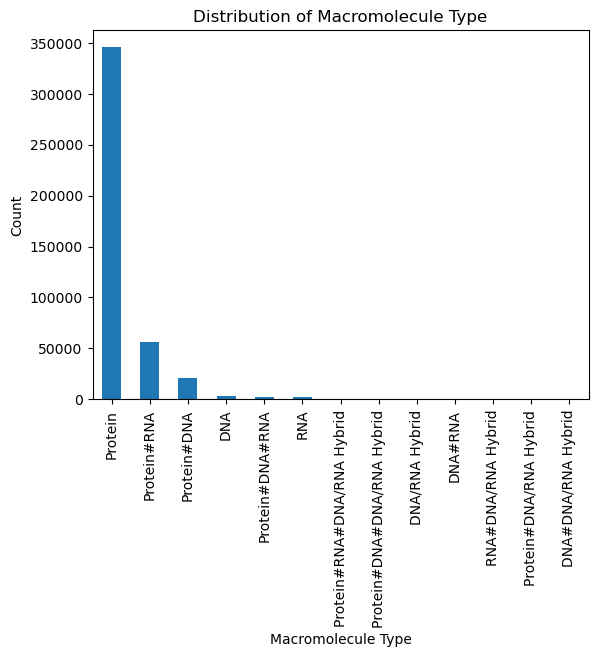

In [2]:
print("Shape of the dataset: ", data.shape) # Check the shape of the dataset

print("Data types of the columns: ", data.dtypes) # Check the data types of the columns

print("Missing values in each column: ", data.isnull().sum())# Check for missing values

# Handle missing values
data = data.dropna()

# Check the distribution of the target variable
print("Distribution of the target variable: ", data['macromoleculeType'].value_counts())

# Visualize the distribution of the target variable
data['macromoleculeType'].value_counts().plot(kind='bar')
plt.xlabel('Macromolecule Type')
plt.ylabel('Count')
plt.title('Distribution of Macromolecule Type')
plt.show()

# ML

In [3]:
# Convert categorical data to numerical data if necessary
encoder = LabelEncoder()
data['sequence'] = encoder.fit_transform(data['sequence'])

# Select only relevant features
X = data[['sequence', 'residueCount']]
y = data['macromoleculeType']

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  696     1     4     6    10     6     0     0     0     2     0    24
      0]
 [    5     0     0     0     0     0     0     0     0     0     0     1
      0]
 [   13     0     7     1     1     0     0     0     0     0     0     3
      0]
 [   14     0     0     7     0     0     0     0     0     0     0     4
      0]
 [   18     0     1     2 68054   495     2    37     1   338     1    15
      0]
 [   17     0     1     0   789  3343     5    30     0    85     0    11
      1]
 [    0     0     0     0     5    11    13     3     0     0     0     0
      0]
 [    0     0     0     0    90    52     0   363     0    28     0     1
      0]
 [    0     0     0     0     1     1     0     0     6     2     0     0
      0]
 [    7     0     0     0   890   126     0    52     3 10239     3    16
      1]
 [    0     0     0     0     2     1     0     0     0    48     9     0
      0]
 [   51     0     3     4     9     9     0     4     0    15     0   359
      4]
 [  